### Import necessary package for data visualization

In [1]:
!pip install seaborn

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pandas as pd

### Loading the dataset

In [18]:

data = pd.read_json("hf://datasets/Amod/mental_health_counseling_conversations/combined_dataset.json", lines=True)

### Context length distribution

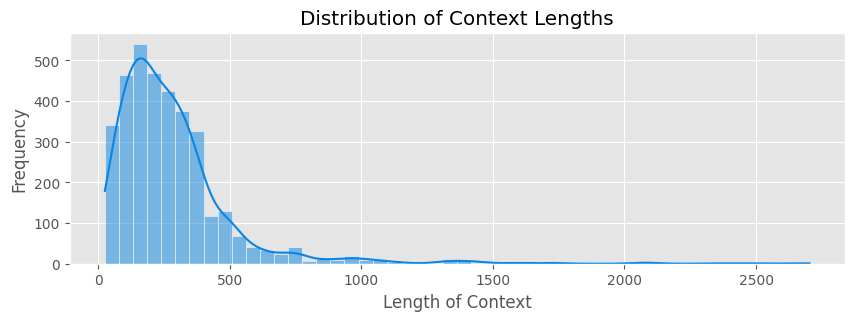

In [19]:
data['Context_length'] = data['Context'].apply(len)
plt.figure(figsize=(10, 3))
sns.histplot(data['Context_length'], bins=50, kde=True, color='#0984e3')
plt.title('Distribution of Context Lengths')
plt.xlabel('Length of Context')
plt.ylabel('Frequency')

plt.show()

###

### deleting context length more than 1500 as they are very few

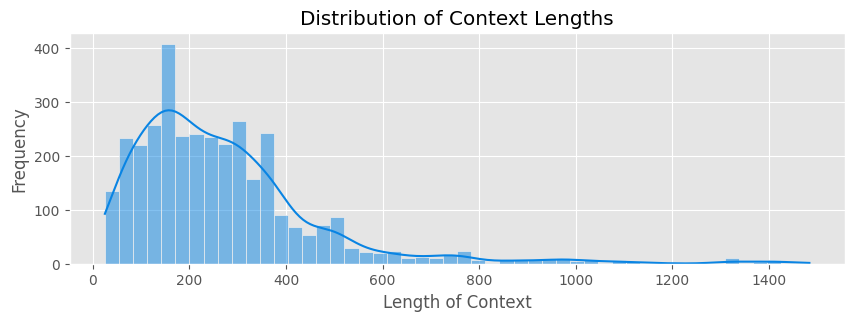

In [20]:
filtered_data = data[data['Context_length'] <= 1500]

ln_Context = filtered_data['Context'].apply(len)
plt.figure(figsize=(10, 3))
sns.histplot(ln_Context, bins=50, kde=True, color="#0984e3")
plt.title('Distribution of Context Lengths')
plt.xlabel('Length of Context')
plt.ylabel('Frequency')
plt.show()


### Response length distribution

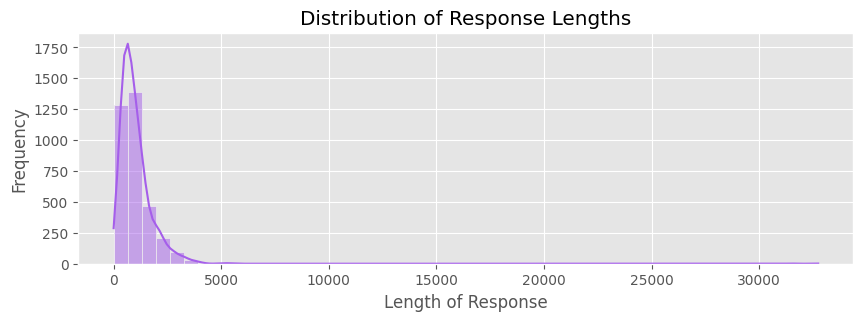

In [21]:
#Lets check now the length of words in each Response
ln_Response = filtered_data['Response'].apply(len)
plt.figure(figsize=(10, 3))
sns.histplot(ln_Response, bins=50, kde=True, color='#a55eea')
plt.title('Distribution of Response Lengths')
plt.xlabel('Length of Response')
plt.ylabel('Frequency')
plt.show()


### Removing response length more than 4000 as they are very few

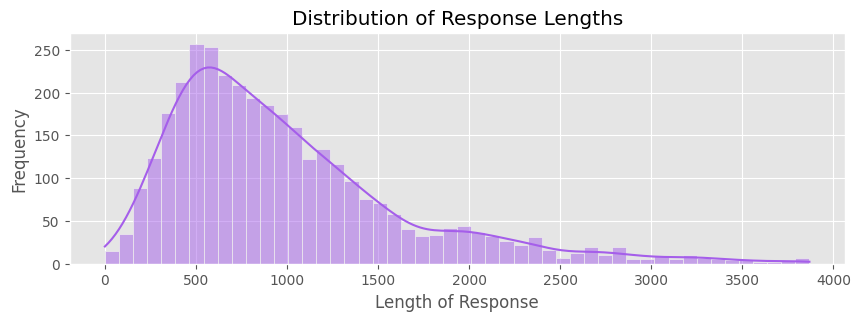

In [22]:
filtered_data = filtered_data[ln_Response <= 4000]

ln_Response = filtered_data['Response'].apply(len)
plt.figure(figsize=(10, 3))
sns.histplot(ln_Response, bins=50, kde=True, color='#a55eea')
plt.title('Distribution of Response Lengths')
plt.xlabel('Length of Response')
plt.ylabel('Frequency')
plt.show()

In [25]:
filtered_data.head()

,Context,Response,Context_length
0,I'm going through some things with my feelings...,"If everyone thinks you're worthless, then mayb...",328
1,I'm going through some things with my feelings...,"Hello, and thank you for your question and see...",328
2,I'm going through some things with my feelings...,First thing I'd suggest is getting the sleep y...,328
3,I'm going through some things with my feelings...,Therapy is essential for those that are feelin...,328
4,I'm going through some things with my feelings...,I first want to let you know that you are not ...,328


In [31]:
filtered_data
# Split the data into train and test sets (90% train, 10% test)
train_data = filtered_data.iloc[:int(len(filtered_data)*0.8)]
test_data = filtered_data.iloc[int(len(filtered_data)*0.8):]

print(f"Training set size: {len(train_data)}")
print(f"Testing set size: {len(test_data)}")

Training set size: 2784
Testing set size: 696


In [32]:
# Save train and test datasets to CSV files
train_data.to_csv('train_mental_health.csv', index=False)
test_data.to_csv('test_mental_health.csv', index=False)

print("Datasets have been saved successfully!")

Datasets have been saved successfully!
